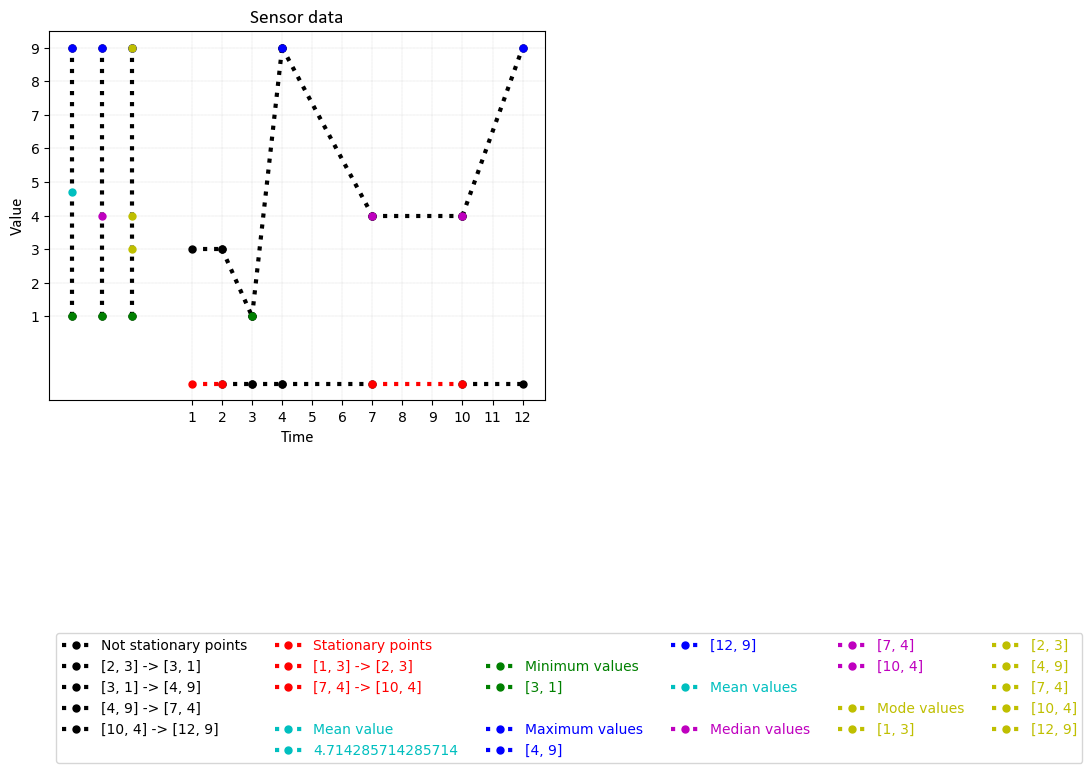

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import warnings

# ignore future warning
warnings.simplefilter ( action = "ignore" , category = FutureWarning )

# function used to get min and max for the two axis respect input sensor data
def get_min_max_values_two_axis ( x_axis_values , y_axis_values ) :

	# find min and max of input sensor data
	min_x_axis = np.min ( x_axis_values )
	max_x_axis = np.max ( x_axis_values )
	min_y_axis = np.min ( y_axis_values )
	max_y_axis = np.max ( y_axis_values )

	# return min and max for the two axis
	return min_x_axis , max_x_axis , min_y_axis , max_y_axis

# function used to get some characteristics of input sensor data
def get_characteristics_input_sensor_data ( y_axis_values ) :

	# mean of the values -> average
	mean = np.mean ( y_axis_values )

	# median of the values -> mid-point value
	median = np.median ( y_axis_values )

	# mode of the values -> most common one
	mode = st.multimode ( y_axis_values )

	# standard deviation -> how spread out the values are
	std = np.std ( y_axis_values )

	#return all characteristics
	return mean , median , mode , std

# function used to check if the input sensor data are correct
def check_input_sensor_data ( x_axis_values , y_axis_values ) :

	# if there is no value in input array
	if len ( x_axis_values ) == 0 :
		return False

	# if the two axis values have the same length
	elif len ( x_axis_values ) == len ( y_axis_values ) :
		return True

	# if the two axis values haven't the same length
	else :
		return False

# function used to set graph properties
def set_graph_properties ( min_x_axis , max_x_axis , min_y_axis , max_y_axis ) :

	# set graph labels
	plt.title (
			"Sensor data" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 14
					}
			)
	plt.xlabel (
			"Time" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 12
					}
			)
	plt.ylabel (
			"Value" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 12
					}
			)

	# set grid property
	plt.grid ( color = "k" , linestyle = ":" , linewidth = 0.1 )

	# set legend position and configuration
	plt.legend ( loc = "lower left" , bbox_to_anchor = (0 , -1) , labelcolor = "linecolor" , ncol = 6 )

	# set ticks in the two axis
	plt.xticks ( np.arange ( min_x_axis , max_x_axis + 1 , step = 1 ) )
	plt.yticks ( np.arange ( min_y_axis , max_y_axis + 1 , step = 1 ) )

	# draw graph
	plt.show ( )

# function used to get stationary and not stationary points
def get_stationary_and_not_stationary_points ( x_axis_values , y_axis_values ) :

	# create lists for stationary and not stationary points
	list_stationary_points = [ ]
	list_not_stationary_points = [ ]

	# find number of points in the graph
	count_points = len ( x_axis_values )

	# for each point
	for i in range ( count_points - 1 ) :

		# calculate actual and next point
		x_values_actual_line = [ x_axis_values [ i ] , x_axis_values [ i + 1 ] ]
		y_values_actual_line = [ y_axis_values [ i ] , y_axis_values [ i + 1 ] ]

		# if the value is stationary
		if y_values_actual_line [ 0 ] == y_values_actual_line [ 1 ] :

			# append actual line to stationary point list
			list_stationary_points.append ( [ x_values_actual_line , y_values_actual_line ] )

		#if the value is not stationary
		else :

			# append actual line to not stationary point list
			list_not_stationary_points.append ( [ x_values_actual_line , y_values_actual_line ] )

	# return stationary and not stationary point lists
	return list_stationary_points , list_not_stationary_points

# function used to plot stationary and not stationary points
def plot_stationary_and_not_stationary_points ( list_stationary_points , list_not_stationary_points ) :

	# for each not stationary point
	for not_stationary_point in list_not_stationary_points :

		# plot actual line with not stationary label
		plt.plot (
				not_stationary_point [ 0 ] , not_stationary_point [ 1 ] ,
				marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
				)

	# for each stationary point
	for stationary_point in list_stationary_points :

		# plot actual line with stationary label
		plt.plot (
				stationary_point [ 0 ] , stationary_point [ 1 ] ,
				marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
				)

# function used to plot the references of stationary and not stationary points into x axis
def plot_references_stationary_and_not_stationary_points_to_x_axis ( min_x_axis , max_x_axis , min_y_axis , max_y_axis , list_stationary_points , list_not_stationary_points ) :

	# legend title for not stationary points
	plt.plot ( [ ] , [ ] , label = "Not stationary points" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5 )

	# for each not stationary point
	for not_stationary_point in list_not_stationary_points :

		# build the string to label each edge
		actual_line = str ( [ not_stationary_point [ 0 ] [ 0 ] , not_stationary_point [ 1 ] [ 0 ] ] ) + " -> " + str ( [ not_stationary_point [ 0 ] [ 1 ] , not_stationary_point [ 1 ] [ 1 ] ] )

		# plot references to x axis
		plt.plot (
				not_stationary_point [ 0 ] , [ min_x_axis - 2 , min_x_axis - 2 ] ,
				label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
				)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	# legend title for stationary points
	plt.plot ( [ ] , [ ] , label = "Stationary points" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "r" , markerfacecolor = "r" , color = "r" , markersize = 5 )

	# for each stationary point
	for stationary_point in list_stationary_points :

		# build the string to label each edge
		actual_line = str ( [ stationary_point [ 0 ] [ 0 ] , stationary_point [ 1 ] [ 0 ] ] ) + " -> " + str ( [ stationary_point [ 0 ] [ 1 ] , stationary_point [ 1 ] [ 1 ] ] )

		# plot references to x axis
		plt.plot (
				stationary_point [ 0 ] , [ min_x_axis - 2 , min_x_axis - 2 ] ,
				label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "r" , markerfacecolor = "r" , color = "r" , markersize = 5
				)

# function used to plot characteristics in all points of the graph
def plot_characteristics_each_point ( x_axis_values , y_axis_values , min_x_axis , max_x_axis , min_y_axis , max_y_axis , mean , median , mode , std ) :

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	# legend title for minimum points
	plt.plot ( [ ] , [ ] , label = "Minimum values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5 )

	# for each point in the graph
	for i in range ( len ( x_axis_values ) ) :

		# if the actual point is minimum
		if y_axis_values [ i ] == min_y_axis :

			# build the string to label each edge
			actual_line = str ( [ x_axis_values [ i ] , y_axis_values [ i ] ] )

			plt.plot (
					x_axis_values [ i ] , y_axis_values [ i ] ,
					label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5
					)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	# legend title for maximum points
	plt.plot ( [ ] , [ ] , label = "Maximum values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5 )

	# for each point in the graph
	for i in range ( len ( x_axis_values ) ) :

		# if the actual point is maximum
		if y_axis_values [ i ] == max_y_axis :

			# build the string to label each edge
			actual_line = str ( [ x_axis_values [ i ] , y_axis_values [ i ] ] )

			plt.plot (
					x_axis_values [ i ] , y_axis_values [ i ] ,
					label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5
					)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	# legend title for mean points
	plt.plot ( [ ] , [ ] , label = "Mean values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "c" , markerfacecolor = "c" , color = "c" , markersize = 5 )

	# for each point in the graph
	for i in range ( len ( x_axis_values ) ) :

		# if the actual point is mean
		if y_axis_values [ i ] == mean :

			# build the string to label each edge
			actual_line = str ( [ x_axis_values [ i ] , y_axis_values [ i ] ] )

			plt.plot (
					x_axis_values [ i ] , y_axis_values [ i ] ,
					label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "c" , markerfacecolor = "c" , color = "c" , markersize = 5
					)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	# legend title for median points
	plt.plot ( [ ] , [ ] , label = "Median values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "m" , markerfacecolor = "m" , color = "m" , markersize = 5 )

	# for each point in the graph
	for i in range ( len ( x_axis_values ) ) :

		# if the actual point is median
		if y_axis_values [ i ] == median :

			# build the string to label each edge
			actual_line = str ( [ x_axis_values [ i ] , y_axis_values [ i ] ] )

			plt.plot (
					x_axis_values [ i ] , y_axis_values [ i ] ,
					label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "m" , markerfacecolor = "m" , color = "m" , markersize = 5
					)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	# legend title for mode points
	plt.plot ( [ ] , [ ] , label = "Mode values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "y" , markerfacecolor = "y" , color = "y" , markersize = 5 )

	# for each point in the graph
	for i in range ( len ( x_axis_values ) ) :

		# for each mode value
		for actual_mode in mode :

			# if the actual point is mode
			if y_axis_values [ i ] == actual_mode :

				# build the string to label each edge
				actual_line = str ( [ x_axis_values [ i ] , y_axis_values [ i ] ] )

				plt.plot (
						[ ] , [ ] ,
						label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "y" , markerfacecolor = "y" , color = "y" , markersize = 5
						)

# function used to plot the references of input sensor data characteristics into y axis
def plot_references_point_characteristics_to_y_axis ( min_x_axis , max_x_axis , min_y_axis , max_y_axis , mean , median , mode , std ) :

	# mean value plot
	plt.plot (
			[ min_x_axis - 4 , min_x_axis - 4 ] , [ min_y_axis , max_y_axis ] ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
			)

	# plot minimum value of input sensor data
	plt.plot (
			min_x_axis - 4 , min_y_axis ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5
			)

	# plot maximum value of input sensor data
	plt.plot (
			min_x_axis - 4 , max_y_axis ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5
			)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	# legend title for stationary points
	plt.plot ( [ ] , [ ] , label = "Mean value" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "c" , markerfacecolor = "c" , color = "c" , markersize = 5 )

	# plot mean value of input sensor data
	plt.plot (
			min_x_axis - 4 , mean ,
			label = str ( mean ) , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "c" , markerfacecolor = "c" , color = "c" , markersize = 5
			)

	# median value plot
	plt.plot (
			[ min_x_axis - 3 , min_x_axis - 3 ] , [ min_y_axis , max_y_axis ] ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
			)

	# plot minimum value of input sensor data
	plt.plot (
			min_x_axis - 3 , min_y_axis ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5
			)

	# plot maximum value of input sensor data
	plt.plot (
			min_x_axis - 3 , max_y_axis ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5
			)

	# plot median value of input sensor data
	plt.plot (
			min_x_axis - 3 , median ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "m" , markerfacecolor = "m" , color = "m" , markersize = 5
			)

	# mode value plot
	plt.plot (
			[ min_x_axis - 2 , min_x_axis - 2 ] , [ min_y_axis , max_y_axis ] ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
			)

	# plot minimum value of input sensor data
	plt.plot (
			min_x_axis - 2 , min_y_axis ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5
			)

	# plot maximum value of input sensor data
	plt.plot (
			min_x_axis - 2 , max_y_axis ,
			marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5
			)

	# plot mode values of input sensor data
	for actual_mode in mode :
		plt.plot (
				min_x_axis - 2 , actual_mode ,
				marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "y" , markerfacecolor = "y" , color = "y" , markersize = 5
				)

# input sensor data
x_axis_values = np.array ( [ 1 , 2 , 3 , 4 , 7 , 10 , 12 ] )
y_axis_values = np.array ( [ 3 , 3 , 1 , 9 , 4 , 4 , 9 ] )

# if input sensor data are correct
if check_input_sensor_data ( x_axis_values , y_axis_values ) :

	# get min and max values for the two axis respect input sensor data
	min_x_axis , max_x_axis , min_y_axis , max_y_axis = get_min_max_values_two_axis ( x_axis_values , y_axis_values )

	# get characteristics of input sensor data
	mean , median , mode , std = get_characteristics_input_sensor_data ( y_axis_values )

	# get lists of stationary and not stationary points
	list_stationary_points , list_not_stationary_points = get_stationary_and_not_stationary_points ( x_axis_values , y_axis_values )

	# plot stationary and not stationary points
	plot_stationary_and_not_stationary_points ( list_stationary_points , list_not_stationary_points )

	# plot the references of stationary and not stationary points into x axis
	plot_references_stationary_and_not_stationary_points_to_x_axis ( min_x_axis , max_x_axis , min_y_axis , max_y_axis , list_stationary_points , list_not_stationary_points )

	# plot the references of input sensor data characteristics into y axis
	plot_references_point_characteristics_to_y_axis ( min_x_axis , max_x_axis , min_y_axis , max_y_axis , mean , median , mode , std )

	# plot
	plot_characteristics_each_point ( x_axis_values , y_axis_values , min_x_axis , max_x_axis , min_y_axis , max_y_axis , mean , median , mode , std )

	# set all graph properties and draw the graph
	set_graph_properties ( min_x_axis , max_x_axis , min_y_axis , max_y_axis )






